# Statistic project 01

## Task 1 
Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
    

In [351]:
import pandas as pd

In [352]:
df=pd.read_csv("games.csv")

In [354]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [355]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [357]:
df=df.dropna()

In [358]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [360]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Task 2 
Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

In [362]:
import seaborn as sns

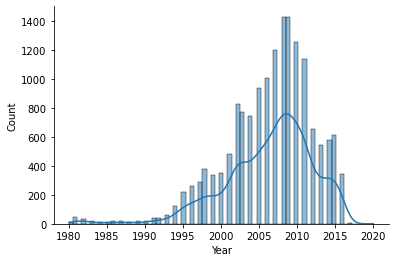

In [366]:
sns.histplot(x="Year",data=df,kde=True)
sns.despine()

In [367]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

## Task 3
На каких платформах произошло больше всего релизов?

In [372]:
df.Platform.value_counts(normalize=True).mul(100)[:1]

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
Name: Platform, dtype: float64

## Task 4
Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [374]:
df.Publisher.value_counts()[:1]

Electronic Arts    1339
Name: Publisher, dtype: int64

## Task 5
 В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

In [377]:
print(df.NA_Sales.median())
print(df.EU_Sales.median())
print(df.JP_Sales.median())
print(df.Other_Sales.median())

0.08
0.02
0.0
0.01


## Task 6
Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

In [378]:
nintendo=df[df["Publisher"]=="Nintendo"]

In [385]:
nintendo.groupby("Genre").agg({"JP_Sales":"sum"}).reset_index().describe()

,JP_Sales
count,12.000000
mean,37.915833
std,33.095629
min,6.030000
25%,13.820000
50%,29.190000
75%,41.630000
max,102.360000


In [394]:
nintendo.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


## Task 7
Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [393]:

nintendo.loc[((nintendo['Genre'] == 'Fighting') | (nintendo['Genre'] == 'Simulation') | \
             (nintendo['Genre'] == 'Simulation') | (nintendo['Genre'] == 'Racing') | \
             (nintendo['Genre'] == 'Sports'))]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
...,...,...,...,...,...,...,...,...,...,...,...
11923,11925,Itoi Shigesato no Bass Tsuri No. 1 Ketteihan!,N64,2000.0,Sports,Nintendo,0.00,0.00,0.07,0.00,0.07
12123,12125,Mario Tennis,Wii,2010.0,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07
12770,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005.0,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06
14626,14629,Calcio Bit,GBA,2006.0,Sports,Nintendo,0.00,0.00,0.03,0.00,0.03


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

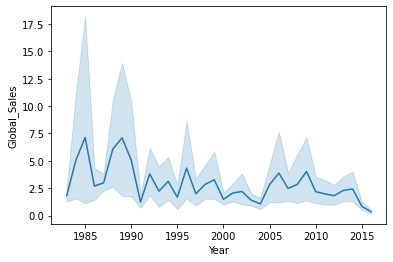

In [400]:
import matplotlib.pyplot as plt
figsize=(12,6)
sns.lineplot(x="Year",y="Global_Sales",data=nintendo)